In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [2]:
images_with_mask_dir = "./sourceImageFolder/with_mask"
images_without_mask_dir = "./sourceImageFolder/without_mask"

In [3]:
data_path = "./sourceImageFolder"
categories = ["with_mask","without_mask"]
data=[]
labels=[]
for category in categories:
  file_path = os.path.join(data_path,category) #with_mask and without_mask folders path
  for img in os.listdir(file_path):
    image_path = os.path.join(file_path,img)# these are images path which is present inside with_mask and without_mask folders
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #convert colour image to grey to reduce compputation
    resize_image = cv2.resize(gray_image,(50,50))  #resize to bring all the images to similar size
    image_array = np.array(resize_image)
    # print(image_array)
    data.append(image_array)
    if category=="with_mask":
      labels.append(1)
    elif category =="without_mask":
      labels.append(0)

In [4]:
print(data[0].shape)
print(len(data))
print(len(labels))

(50, 50)
7553
7553


In [5]:
# Check if the variable is a NumPy array
if isinstance(data[0], np.ndarray):
    print("Variable is a NumPy array")
else:
    print("Variable is not a NumPy array")

Variable is a NumPy array


In [6]:
data=np.array(data)  #shape is (7553,50,50) we have 7553 images each of size (50,50)
num_columns = data.shape[1] * data.shape[2] 
reshaped_data = data.reshape(data.shape[0], num_columns)  #(7553,2500)
df = pd.DataFrame(reshaped_data)
df['Labels'] = labels

In [7]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,Labels
0,215,215,215,215,215,215,214,216,217,217,...,204,154,210,209,209,208,208,208,208,1
1,98,99,96,112,96,98,109,147,160,175,...,95,105,63,11,12,16,4,5,6,1
2,82,82,84,87,86,86,85,83,81,82,...,17,19,22,21,23,19,20,17,27,1
3,220,194,222,255,255,255,255,255,255,255,...,255,255,254,214,136,97,82,73,65,1
4,206,213,220,225,229,234,236,239,241,242,...,255,255,255,255,255,255,255,255,255,1


In [8]:
def sample_train_test_accuracy(X_train, y_train, X_test, y_test):
    subset_sizes = np.linspace(0.001, 0.3, num=10)  # 0.1% to 10%  i.e.,
# ex: - [0.001, 0.01211111,0.02322222,0.03433333,0.04544444,0.05655556,0.06766667,0.07877778,0.08988889,0.1] 
    accuracies = []
    f1_scores=[]
    for size_percentage in subset_sizes:
        # Sample subset of training data
        X_subset,_ , y_subset, _ = train_test_split(X_train, y_train, train_size=size_percentage, random_state=42)
        #I did not take test from here becuase when train is 0.1% test will be remianing 99.9% which is very high
        #To reduce the dimensionality we are using PCA
        desired_variance = 0.95
        pca = PCA(n_components=desired_variance)
        X_train_pca = pca.fit_transform(X_subset)
        X_test_pca = pca.transform(X_test)
        # kNN classifier
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_pca, y_subset)
        y_pred = knn.predict(X_test_pca)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

    plt.plot(subset_sizes * 100, accuracies, marker='o', label='Accuracy')
    plt.plot(subset_sizes * 100, f1_scores, marker='o', label='F1 Score')
    plt.xlabel("Training Set Size (%)")
    plt.ylabel("Metric Score")
    plt.title("Test Metric Score vs. Training Set Size")
    plt.legend()
    plt.grid(True)
    plt.show()


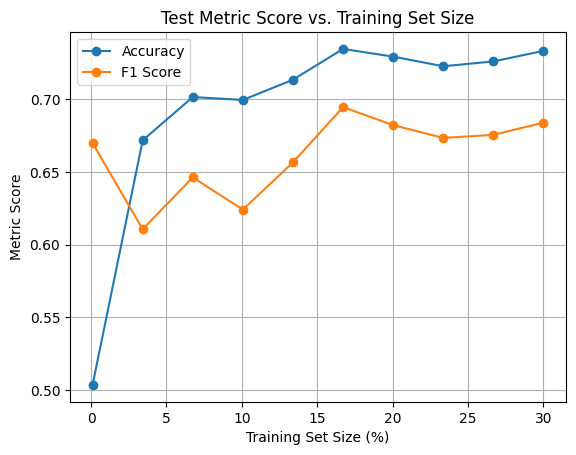

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Labels', axis=1), df['Labels'], test_size=0.2, random_state=42)
sample_train_test_accuracy(X_train, y_train, X_test, y_test)

In [10]:
categories = ["with_mask","without_mask"]
data_cnn=[]
labels_cnn=[]

path_of_data = "./sourceImageFolder"
for category in categories:
  file_path1 = os.path.join(path_of_data,category) #with_mask and without_mask folders path
  for img in os.listdir(file_path1):
    image_path = os.path.join(file_path1,img)# these are images path which is present inside with_mask and without_mask folders
    image = cv2.imread(image_path)
    #here i am not converting the image into Grey
    resize_image = cv2.resize(image,(128,128))  #resize to bring all the images to similar size
    image_array = np.array(resize_image)
    # print(image_array)
    data_cnn.append(image_array)
    if category=="with_mask":
      labels_cnn.append(1)
    elif category =="without_mask":
      labels_cnn.append(0)
data_cnn[0].shape

(128, 128, 3)

In [11]:
X=np.array(data_cnn)
Y=np.array(labels_cnn)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)
X_train_scaled=X_train/255
X_test_scaled=X_test/255
import tensorflow as tf
from tensorflow import keras
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

2024-04-18 13:25:53.527337: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
 14/170 ━━━━━━━━━━━━━━━━━━━━ 59s 382ms/step - acc: 0.4784 - loss: 1.0386

KeyboardInterrupt: 